# 馬鹿よ貴方は関連リツイートに向けての練習

In [1]:
from requests_oauthlib import OAuth1Session
import json
import settings

In [2]:
twitter = OAuth1Session(settings.CONSUMER_KEY, settings.CONSUMER_SECRET, settings.ACCESS_TOKEN, settings.ACCESS_TOKEN_SECRET)

### 基本

In [3]:
import search_word

In [25]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=2".format(word = search_word.bakayo), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'], tweet_statuses['user']['name'], tweet_statuses['user']['screen_name'])

803798304295268352 Wed Nov 30 03:10:24 +0000 2016 Walive! - お笑いライブ検索 walive_info
803796885563527168 Wed Nov 30 03:04:45 +0000 2016 ふるやいなや jiritsusinn


In [26]:
tweets['statuses']

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Mon Nov 28 09:40:30 +0000 2016',
  'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 803171703413051392,
  'id_str': '803171703413051392',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'ja',
  'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'text': '平井ファラオ光にそっくりな人いてガン見してもうた。よく見たら若干違った。',
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Mon Nov 30 06:41:35 +0000 2009',
   'default_profile': True,
   'default_profile_image': False,
   'description': '桃缶推し',
   

## リツイート

In [4]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=2".format(word = search_word.bakayo), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    tweet_id = tweet_statuses['id']
    params = {}
    print('***')
    print(tweet_statuses['text'])
    req = twitter.post("https://api.twitter.com/1.1/statuses/retweet/{tweet_id}.json".format(tweet_id=tweet_id),params = params)

***
平井ファラオ光の私服かっこよさそう
***
@dmgtjad おぉ、仲間ですね😍
馬鹿よ貴方はのファラオですね♪
私の母親も千原兄弟好きですよ^^


### データ分析したい

In [4]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['time', 'id'])

In [5]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=2".format(word = search_word.bakayo), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'])
    df_addition_row = pd.DataFrame([[tweet_statuses['created_at'],tweet_statuses['id']]])
    df_addition_row.columns =["time","id"]
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803207354586042368 Mon Nov 28 12:02:10 +0000 2016
803193267655352320 Mon Nov 28 11:06:12 +0000 2016


In [6]:
df_tbl

,time,id
0,Mon Nov 28 12:02:10 +0000 2016,8.032074e+17
0,Mon Nov 28 11:06:12 +0000 2016,8.031933e+17


### 時間軸で分析したい

In [11]:
df_tbl = pd.DataFrame(columns=['week','month','day','time','jisa','year'])

In [12]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=100".format(word = search_word.bakayo), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'])
    time = tweet_statuses['created_at'].split(' ')
    df_addition_row = pd.DataFrame([[time[0], time[1], time[2], time[3], time[4], time[5]]])
    df_addition_row.columns = ['week','month','day','time','jisa','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803207354586042368 Mon Nov 28 12:02:10 +0000 2016
803193267655352320 Mon Nov 28 11:06:12 +0000 2016
803190396649996288 Mon Nov 28 10:54:47 +0000 2016
803188011571609600 Mon Nov 28 10:45:19 +0000 2016
803175166821838848 Mon Nov 28 09:54:16 +0000 2016
803175032604135424 Mon Nov 28 09:53:44 +0000 2016
803174484278550528 Mon Nov 28 09:51:33 +0000 2016
803171703413051392 Mon Nov 28 09:40:30 +0000 2016
803168691055685632 Mon Nov 28 09:28:32 +0000 2016
803162373481603074 Mon Nov 28 09:03:26 +0000 2016
803156754385158144 Mon Nov 28 08:41:06 +0000 2016
803156718217674752 Mon Nov 28 08:40:58 +0000 2016
803156688463273984 Mon Nov 28 08:40:51 +0000 2016
803154258375753728 Mon Nov 28 08:31:11 +0000 2016
803153718434635781 Mon Nov 28 08:29:03 +0000 2016
803136274735300608 Mon Nov 28 07:19:44 +0000 2016
803133022610436096 Mon Nov 28 07:06:48 +0000 2016
803112732325126144 Mon Nov 28 05:46:11 +0000 2016
803095151476256768 Mon Nov 28 04:36:19 +0000 2016
803093744467619842 Mon Nov 28 04:30:44 +0000 2016


In [13]:
df_tbl

,week,month,day,time,jisa,year
0,Mon,Nov,28,12:02:10,+0000,2016
0,Mon,Nov,28,11:06:12,+0000,2016
0,Mon,Nov,28,10:54:47,+0000,2016
0,Mon,Nov,28,10:45:19,+0000,2016
0,Mon,Nov,28,09:54:16,+0000,2016
0,Mon,Nov,28,09:53:44,+0000,2016
0,Mon,Nov,28,09:51:33,+0000,2016
0,Mon,Nov,28,09:40:30,+0000,2016
0,Mon,Nov,28,09:28:32,+0000,2016
0,Mon,Nov,28,09:03:26,+0000,2016


In [23]:
df_tbl.groupby('day').count()

,week,month,time,jisa,year
day,,,,,
27,76,76,76,76,76
28,24,24,24,24,24


### SQLITE3に登録しておきたい

create table bakayo_time(
    id int primary key,
    week varchar,
    month varchar,
    day int,
    time varchar,
    jisa varchar,
    year int
)

In [3]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [11]:
query = '''
SELECT max(id) FROM bakayo_time
'''
maxid = c.execute(query)

In [12]:
list_maxid = c.fetchall()
max_id = list_maxid[0][0]

In [13]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['id', 'week','month','day','time','jisa','year'])

In [14]:
if max_id == None:
    max_id = 0

In [15]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=100".format(word = search_word.bakayo), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    tweet_id = tweet_statuses['id']
    time = tweet_statuses['created_at'].split(' ')
    if tweet_id > max_id:
        print(tweet_statuses['id'], tweet_statuses['created_at'])
        insert_query = '''
        INSERT INTO bakayo_time VALUES({tweet_id}, '{t1}', '{t2}', {t3}, '{t4}', '{t5}', {t6})
        '''.format(tweet_id=tweet_id,t1=time[0],t2=time[1],t3=time[2],t4=time[3],t5=time[4],t6=time[5])
        c.execute(insert_query)
    
        df_addition_row = pd.DataFrame([[tweet_id, time[0], time[1], time[2], time[3], time[4], time[5]]])
        df_addition_row.columns = ['id', 'week','month','day','time','jisa','year']
        df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803528585537470464 Tue Nov 29 09:18:38 +0000 2016
803527040922054656 Tue Nov 29 09:12:30 +0000 2016
803516695386071040 Tue Nov 29 08:31:23 +0000 2016
803500228884111360 Tue Nov 29 07:25:57 +0000 2016
803486006863273984 Tue Nov 29 06:29:26 +0000 2016
803485566394241025 Tue Nov 29 06:27:41 +0000 2016
803485547792449538 Tue Nov 29 06:27:37 +0000 2016
803485471464562689 Tue Nov 29 06:27:19 +0000 2016
803485427906711553 Tue Nov 29 06:27:08 +0000 2016
803485235715317761 Tue Nov 29 06:26:22 +0000 2016
803485077682294784 Tue Nov 29 06:25:45 +0000 2016
803484944953507840 Tue Nov 29 06:25:13 +0000 2016
803482300855918592 Tue Nov 29 06:14:43 +0000 2016
803481890980184064 Tue Nov 29 06:13:05 +0000 2016
803466480109031424 Tue Nov 29 05:11:51 +0000 2016
803456127442636800 Tue Nov 29 04:30:42 +0000 2016
803429186459181056 Tue Nov 29 02:43:39 +0000 2016
803429185486061573 Tue Nov 29 02:43:39 +0000 2016
803425939531018240 Tue Nov 29 02:30:45 +0000 2016
803425309064237057 Tue Nov 29 02:28:15 +0000 2016


In [16]:
conn.commit()

In [17]:
conn.close()

In [14]:
df_tbl

,id,week,month,day,time,jisa,year
0,8.032296e+17,Mon,Nov,28,13:30:40,+0000,2016
0,8.032294e+17,Mon,Nov,28,13:29:58,+0000,2016
0,8.032287e+17,Mon,Nov,28,13:26:56,+0000,2016
0,8.032278e+17,Mon,Nov,28,13:23:29,+0000,2016
0,8.032268e+17,Mon,Nov,28,13:19:38,+0000,2016
0,8.032264e+17,Mon,Nov,28,13:17:44,+0000,2016
0,8.032185e+17,Mon,Nov,28,12:46:39,+0000,2016
0,8.032162e+17,Mon,Nov,28,12:37:26,+0000,2016
0,8.032147e+17,Mon,Nov,28,12:31:26,+0000,2016
0,8.032112e+17,Mon,Nov,28,12:17:25,+0000,2016


### 日ごとのツイート数

In [142]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [143]:
query = '''
SELECT count(id), month, day, year FROM bakayo_time GROUP BY month, day, year
'''
count_id = c.execute(query)

In [144]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['count_id','month','day','year'])

In [145]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1], row[2], row[3]]])
    df_addition_row.columns = ['count_id','month','day','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(72, 'Nov', 27, 2016)
(29, 'Nov', 28, 2016)


In [146]:
df_tbl

,count_id,month,day,year
0,72.0,Nov,27.0,2016.0
0,29.0,Nov,28.0,2016.0


### 描画したい

In [115]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

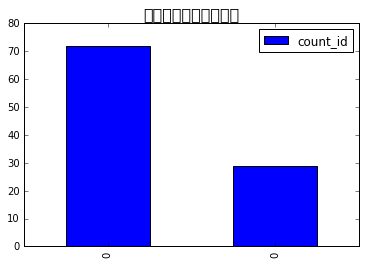

In [147]:
df_tbl.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)

### DBにあるデータをすべて取ってくる

In [128]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [129]:
query = '''
SELECT * FROM bakayo_time
'''
count_id = c.execute(query)

In [130]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['id', 'week','month','day','time','jisa','year'])

In [131]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1], row[2], row[3], row[4], row[5], row[6]]])
    df_addition_row.columns = ['id', 'week','month','day','time','jisa','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(803216227845799937, 'Mon', 'Nov', 28, '12:37:26', '+0000', 2016)
(803214717716086784, 'Mon', 'Nov', 28, '12:31:26', '+0000', 2016)
(803211189412995072, 'Mon', 'Nov', 28, '12:17:25', '+0000', 2016)
(803208824316301312, 'Mon', 'Nov', 28, '12:08:01', '+0000', 2016)
(803207354586042368, 'Mon', 'Nov', 28, '12:02:10', '+0000', 2016)
(803193267655352320, 'Mon', 'Nov', 28, '11:06:12', '+0000', 2016)
(803190396649996288, 'Mon', 'Nov', 28, '10:54:47', '+0000', 2016)
(803188011571609600, 'Mon', 'Nov', 28, '10:45:19', '+0000', 2016)
(803175166821838848, 'Mon', 'Nov', 28, '09:54:16', '+0000', 2016)
(803175032604135424, 'Mon', 'Nov', 28, '09:53:44', '+0000', 2016)
(803174484278550528, 'Mon', 'Nov', 28, '09:51:33', '+0000', 2016)
(803171703413051392, 'Mon', 'Nov', 28, '09:40:30', '+0000', 2016)
(803168691055685632, 'Mon', 'Nov', 28, '09:28:32', '+0000', 2016)
(803162373481603074, 'Mon', 'Nov', 28, '09:03:26', '+0000', 2016)
(803156754385158144, 'Mon', 'Nov', 28, '08:41:06', '+0000', 2016)
(803156718

In [132]:
df_tbl

,id,week,month,day,time,jisa,year
0,8.032162e+17,Mon,Nov,28.0,12:37:26,+0000,2016.0
0,8.032147e+17,Mon,Nov,28.0,12:31:26,+0000,2016.0
0,8.032112e+17,Mon,Nov,28.0,12:17:25,+0000,2016.0
0,8.032088e+17,Mon,Nov,28.0,12:08:01,+0000,2016.0
0,8.032074e+17,Mon,Nov,28.0,12:02:10,+0000,2016.0
0,8.031933e+17,Mon,Nov,28.0,11:06:12,+0000,2016.0
0,8.031904e+17,Mon,Nov,28.0,10:54:47,+0000,2016.0
0,8.031880e+17,Mon,Nov,28.0,10:45:19,+0000,2016.0
0,8.031752e+17,Mon,Nov,28.0,09:54:16,+0000,2016.0
0,8.031750e+17,Mon,Nov,28.0,09:53:44,+0000,2016.0


### 曜日ごとのツイート

In [12]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [13]:
query = '''
SELECT count(id), week FROM bakayo_time GROUP BY week
'''
count_id = c.execute(query)

In [14]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['count_id','week'])

In [15]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1]]])
    df_addition_row.columns = ['count_id','week']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(566, 'Fri')
(167, 'Mon')
(226, 'Sat')
(603, 'Sun')
(89, 'Thu')
(121, 'Tue')
(197, 'Wed')


In [16]:
df_tbl

,count_id,week
0,566.0,Fri
0,167.0,Mon
0,226.0,Sat
0,603.0,Sun
0,89.0,Thu
0,121.0,Tue
0,197.0,Wed


In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

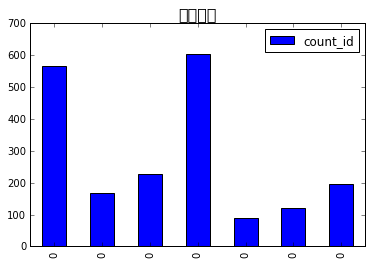

In [18]:
df_tbl.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)